# BIOF509 Final project: Using clinical data to classify stroke type
# Ching-Heng, Lin

## Background
A stroke can be caused by a blocked artery (ischemic stroke) or the leaking of a blood vessel (hemorrhagic stroke). These two distinct types of stroke have different symptoms and treatments.

## Dataset
The Stroke Registry (TSR) has prospectively collected data from stroke patients since 2006 at 54 major hospitals in Taiwan. The TSR collects preadmission data, and inpatient elements including clinical care during hospitalization, in-hospital complications, stroke risk factors, laboratory results of blood tests, electrocardiography, computed tomography (CT) and magnetic resonance imaging (MRI) findings, medications during admission, discharge status, and follow-up information.

Details of Dataset
<br><b>Sample size:</b> 60,985(ischemia) vs. 7,975 (hemorrhage)
<br><b>Features (48)</b>:
<br>* Demographic (Age, Gender, Height, Weight)
<br>* NIHSS
<br>* GCS & Vital Sign (SBP, DBP, BT, HR, RR)
<br>* Laboratory Data (Hb, Hct, Platelet,WBC, PTT, PT(INR), Glucose ,BUN, Creatinine, Albumin, CRP, HbA1c, Glucose, UA, T-CHO, TG, HDL, LDL, GOT, GPT)
<br>* Risk Factors (Heart Disease, Previous TIA, Previous CVA, Dyslipidemia, Cerebral Infarction, Hypertriglyceridemia, Cerebral Hemorrhage, Hypercholesterolemia, Polycythemia, HT, Hyperuricemia, DM, Uremia, PAD)


## Goal
Building a stroke diagnosis classifier using TSR dataset including Glasgow coma scale(GCS), vital sign, laboratory data, admission NIH stroke scale(NIHSS) and ECG finding.

## Methods
Each stroke case has been labeld as ischemic stroke and hemorrhagic stroke. Therefore, this project will adopt supervised learning algorithm for classifier development.

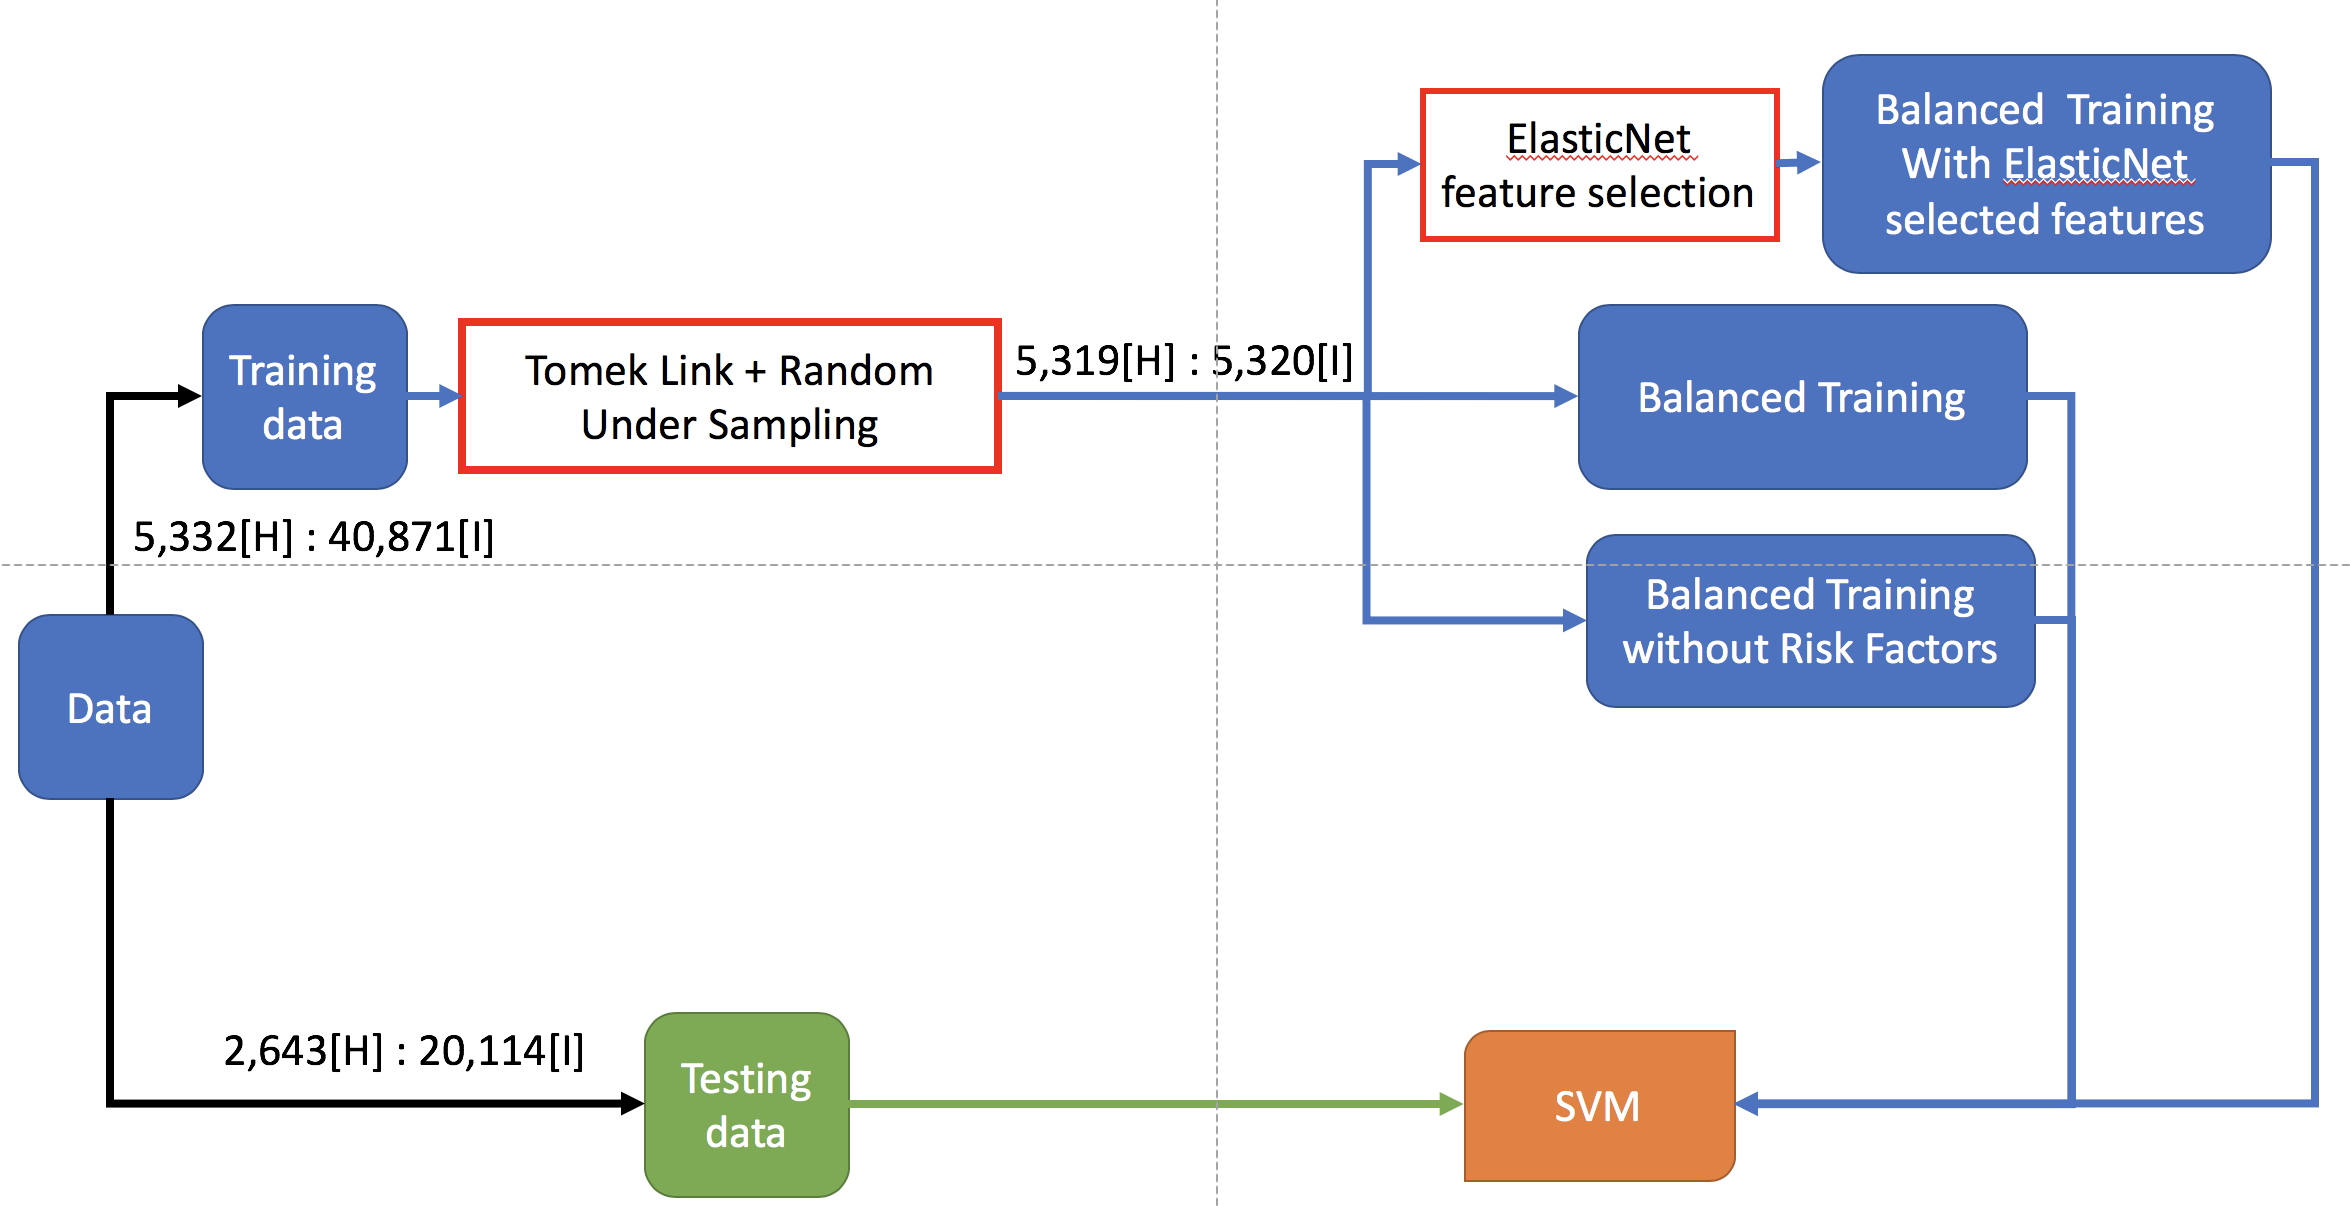

### My utility codes

In [1]:
# !pip install imblearn
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.utils import resample
from datetime import datetime
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler
from imblearn.over_sampling import SMOTE
import numpy as np

case_column = ['ICASE_ID',
               'IDCASE_ID',
               'ORG_ID',
               'HEIGHT_NM',
               'WEIGHT_NM',
               'OPC_ID',
               'ONSET_DT',
               'GCSE_NM',
               'GCSV_NM',
               'GCSM_NM',
               'SBP_NM',
               'DBP_NM',
               'BT_NM',
               'HR_NM',
               'RR_NM',
               'ICD_ID',
               'HB_NM',
               'HCT_NM',
               'PLATELET_NM',
               'WBC_NM',
               'PTT1_NM',
               'PTT2_NM',
               'PTINR_NM',
               'ER_NM',
               'BUN_NM',
               'CRE_NM',
               'ALB_NM',
               'CRP_NM',
               'HBAC_NM'
               ]

nihs_column = [
    'ICASE_ID',
    'IDCASE_ID',
    'NIHS_1a_in',
    'NIHS_1b_in',
    'NIHS_1c_in',
    'NIHS_2_in',
    'NIHS_3_in',
    'NIHS_4_in',
    'NIHS_5aL_in',
    'NIHS_5bR_in',
    'NIHS_6aL_in',
    'NIHS_6bR_in',
    'NIHS_7_in',
    'NIHS_8_in',
    'NIHS_9_in',
    'NIHS_10_in',
    'NIHS_11_in'
]

dgfa_column = [
    'HT_ID',
    'HC_ID',
    'DM_ID',
    'PCVA_ID',
    'PTIA_ID',
    'HD_ID',
    'UR_ID',
    'PAD_ID'
]

case_column_date = [
            'ONSETH_NM',
            'ONSETM_NM',
            'OT_DT',
            'OTTIH_NM',
            'OTTIM_NM',
            'FLOOK_DT',
            'FLOOKH_NM',
            'FLOOKM_NM',
            'NIHSIN_DT',
            'NIHSINH_NM',
            'NIHSINM_NM'
            ]

def clean_nihs():
    df_nihs = pd.read_csv('CASEDNIHS(denormalized).csv')
    # print(df_nihs.shape)
    df_nihs['NIHS_1a_in'].loc[~df_nihs.NIHS_1a_in.isin(['0', '1', '2', '3'])] = np.nan
    df_nihs['NIHS_1a_out'].loc[~df_nihs.NIHS_1a_out.isin(['0', '1', '2', '3'])] = np.nan
    df_nihs['NIHS_1b_in'].loc[~df_nihs.NIHS_1b_in.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_1b_out'].loc[~df_nihs.NIHS_1b_out.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_1c_in'].loc[~df_nihs.NIHS_1c_in.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_1c_out'].loc[~df_nihs.NIHS_1c_out.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_2_in'].loc[~df_nihs.NIHS_2_in.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_2_out'].loc[~df_nihs.NIHS_2_out.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_3_in'].loc[~df_nihs.NIHS_3_in.isin(['0', '1', '2', '3'])] = np.nan
    df_nihs['NIHS_3_out'].loc[~df_nihs.NIHS_3_out.isin(['0', '1', '2', '3'])] = np.nan
    df_nihs['NIHS_4_in'].loc[~df_nihs.NIHS_4_in.isin(['0', '1', '2', '3'])] = np.nan
    df_nihs['NIHS_4_out'].loc[~df_nihs.NIHS_4_out.isin(['0', '1', '2', '3'])] = np.nan
    df_nihs['NIHS_5aL_in'].loc[~df_nihs.NIHS_5aL_in.isin(['0', '1', '2', '3', '4'])] = np.nan
    df_nihs['NIHS_5aL_out'].loc[~df_nihs.NIHS_5aL_out.isin(['0', '1', '2', '3', '4'])] = np.nan
    df_nihs['NIHS_5bR_in'].loc[~df_nihs.NIHS_5bR_in.isin(['0', '1', '2', '3', '4'])] = np.nan
    df_nihs['NIHS_5bR_out'].loc[~df_nihs.NIHS_5bR_out.isin(['0', '1', '2', '3', '4'])] = np.nan
    df_nihs['NIHS_6aL_in'].loc[~df_nihs.NIHS_6aL_in.isin(['0', '1', '2', '3', '4'])] = np.nan
    df_nihs['NIHS_6aL_out'].loc[~df_nihs.NIHS_6aL_out.isin(['0', '1', '2', '3', '4'])] = np.nan
    df_nihs['NIHS_6bR_in'].loc[~df_nihs.NIHS_6bR_in.isin(['0', '1', '2', '3', '4'])] = np.nan
    df_nihs['NIHS_6bR_out'].loc[~df_nihs.NIHS_6bR_out.isin(['0', '1', '2', '3', '4'])] = np.nan
    df_nihs['NIHS_7_in'].loc[~df_nihs.NIHS_7_in.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_7_out'].loc[~df_nihs.NIHS_7_out.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_8_in'].loc[~df_nihs.NIHS_8_in.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_8_out'].loc[~df_nihs.NIHS_8_out.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_9_in'].loc[~df_nihs.NIHS_9_in.isin(['0', '1', '2', '3'])] = np.nan
    df_nihs['NIHS_9_out'].loc[~df_nihs.NIHS_9_out.isin(['0', '1', '2', '3'])] = np.nan
    df_nihs['NIHS_10_in'].loc[~df_nihs.NIHS_10_in.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_10_out'].loc[~df_nihs.NIHS_10_out.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_11_in'].loc[~df_nihs.NIHS_11_in.isin(['0', '1', '2'])] = np.nan
    df_nihs['NIHS_11_out'].loc[~df_nihs.NIHS_11_out.isin(['0', '1', '2'])] = np.nan
    df_nihs.dropna(axis=0, inplace=True)
    # print(df_nihs.shape)
    df_nihs['NIHS_TOTAL_IN'] = df_nihs.NIHS_1a_in+df_nihs.NIHS_1b_in+df_nihs.NIHS_1c_in+df_nihs.NIHS_2_in+df_nihs.NIHS_3_in+\
                          df_nihs.NIHS_4_in+df_nihs.NIHS_5aL_in+df_nihs.NIHS_5bR_in+df_nihs.NIHS_6aL_in+\
                          df_nihs.NIHS_6bR_in+df_nihs.NIHS_7_in+df_nihs.NIHS_8_in+df_nihs.NIHS_9_in+df_nihs.NIHS_10_in+\
                          df_nihs.NIHS_11_in
    df_nihs['NIHS_TOTAL_OUT'] = df_nihs.NIHS_1a_out+df_nihs.NIHS_1b_out+df_nihs.NIHS_1c_out+df_nihs.NIHS_2_out+df_nihs.NIHS_3_out+ \
                          df_nihs.NIHS_4_out+df_nihs.NIHS_5aL_out+df_nihs.NIHS_5bR_out+df_nihs.NIHS_6aL_out+ \
                          df_nihs.NIHS_6bR_out+df_nihs.NIHS_7_out+df_nihs.NIHS_8_out+df_nihs.NIHS_9_out+df_nihs.NIHS_10_out+ \
                          df_nihs.NIHS_11_out
    df_nihs['DIFF'] = df_nihs.NIHS_TOTAL_OUT - df_nihs.NIHS_TOTAL_IN
    return df_nihs


def clean_dbmrs():
    df_dbmrs = pd.read_csv('CASEDBMRS(denormalized).csv')
    df_dbmrs['Feeding'].loc[~df_dbmrs.Feeding.isin(['0', '5', '10'])] = np.nan
    df_dbmrs['Transfers'].loc[~df_dbmrs.Transfers.isin(['0', '5', '10', '15'])] = np.nan
    df_dbmrs['Bathing'].loc[~df_dbmrs.Bathing.isin(['0', '5'])] = np.nan
    df_dbmrs['Toilet_use'].loc[~df_dbmrs.Toilet_use.isin(['0', '5', '10'])] = np.nan
    df_dbmrs['Grooming'].loc[~df_dbmrs.Grooming.isin(['0', '5'])] = np.nan
    df_dbmrs['Mobility'].loc[~df_dbmrs.Mobility.isin(['0', '5', '10', '15'])] = np.nan
    df_dbmrs['Stairs'].loc[~df_dbmrs.Stairs.isin(['0', '5', '10'])] = np.nan
    df_dbmrs['Dressing'].loc[~df_dbmrs.Dressing.isin(['0', '5', '10'])] = np.nan
    df_dbmrs['Bowel_control'].loc[~df_dbmrs.Bowel_control.isin(['0', '5', '10'])] = np.nan
    df_dbmrs['Bladder_control'].loc[~df_dbmrs.Bladder_control.isin(['0', '5', '10'])] = np.nan
    df_dbmrs['discharged_mrs'].loc[~df_dbmrs.discharged_mrs.isin(['0', '1', '2', '3', '4', '5', '6'])] = np.nan
    return df_dbmrs


def clean_rfur():
    df_rfur = pd.read_csv('CASEDRFUR(denormalized).csv')
    rfur_cols = ['VERS_1', 'VERS_3', 'VERS_6', 'VERS_12', 'VEIHD_1', 'VEIHD_3', 'VEIHD_6', 'VEIHD_12']
    df_rfur.drop(rfur_cols, axis=1, inplace=True)
    df_rfur['MRS_1'].loc[~df_rfur.MRS_1.isin(['0', '1', '2', '3', '4', '5', '6'])] = np.nan
    df_rfur['MRS_3'].loc[~df_rfur.MRS_3.isin(['0', '1', '2', '3', '4', '5', '6'])] = np.nan
    df_rfur['MRS_6'].loc[~df_rfur.MRS_6.isin(['0', '1', '2', '3', '4', '5', '6'])] = np.nan
    df_rfur['MRS_12'].loc[~df_rfur.MRS_12.isin(['0', '1', '2', '3', '4', '5', '6'])] = np.nan
    return df_rfur


def get_cleaned_dgfa_for_er():
    df_dgfa = pd.read_csv('CASEDDGFA.csv')
    df_dgfa = df_dgfa[['ICASE_ID', 'IDCASE_ID']+dgfa_column]
    for c in dgfa_column:
        # Don't want 'don't know'
        df_dgfa[c].loc[~df_dgfa[c].isin([0., 1.])] = np.nan
    df_dgfa.dropna(axis=0, inplace=True)
    return df_dgfa

def get_cleaned_nihs_for_er():
    df_nihs = clean_nihs()
    df_nihs = df_nihs[nihs_column]
    df_nihs.dropna(axis=0)
    return df_nihs


def outliers_iqr(ys):
    quartile_1, quartile_3 = np.nanpercentile(ys, [25, 75],)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))


def outlier_to_mean(df, columns):
    for col in columns:
        df[col].loc[df[col] > 998] = np.nan
        outlier_inx = outliers_iqr(df[col])
        df[col].loc[outlier_inx] = np.nan
    df[columns] = Imputer(missing_values=np.nan, strategy='mean', axis=0).fit_transform(df[columns])
    return df


def get_cleaned_case_for_er():
    df_case = pd.read_csv('CASEDCASE.csv')
    df_case = df_case[case_column]

    # Replace numeric outlier to Median
    outlier_cols = ['HEIGHT_NM', 'WEIGHT_NM', 'SBP_NM', 'DBP_NM', 'BT_NM', 'HR_NM', 'RR_NM',
                    'HB_NM', 'HCT_NM', 'PLATELET_NM', 'WBC_NM', 'PTT1_NM', 'PTT2_NM', 'PTINR_NM',
                    'ER_NM', 'BUN_NM', 'CRE_NM', 'ALB_NM', 'CRP_NM', 'HBAC_NM']
    df_case = outlier_to_mean(df_case, outlier_cols)
    # Degree type data
    df_case['OPC_ID'].loc[~df_case.OPC_ID.isin(['1', '2', '3'])] = np.nan
    df_case['ICD_ID'].loc[~df_case.ICD_ID.isin(['1', '2', '3', '4'])] = np.nan
    df_case['GCSE_NM'].loc[~df_case.GCSE_NM.isin(['1', '2', '3', '4', '5', '6'])] = np.nan
    df_case['GCSV_NM'].loc[~df_case.GCSV_NM.isin(['1', '2', '3', '4', '5', '6'])] = np.nan
    df_case['GCSM_NM'].loc[~df_case.GCSM_NM.isin(['1', '2', '3', '4', '5', '6'])] = np.nan
    # Date type
    df_case['ONSET_DT'] = pd.to_datetime(df_case['ONSET_DT'], format='%Y-%M-%d', errors='coerce')
    df_case.dropna(axis=0, inplace=True)
    return df_case


def get_cleaned_mcase():
    df_mcase = pd.read_csv('CASEMCASE.csv')
    df_mcase = df_mcase[['ICASE_ID', 'BIRTH_DT', 'GENDER_TX']]
    df_mcase['BIRTH_DT'] = pd.to_datetime(df_mcase['BIRTH_DT'], format='%Y-%M-%d', errors='coerce')
    df_mcase['GENDER_TX'] = df_mcase['GENDER_TX'].replace(to_replace={'F': 0, 'M': 1})
    return df_mcase


def get_age(df):
    age = df['ONSET_DT'].year - df['BIRTH_DT'].year - ((df['ONSET_DT'].month, df['ONSET_DT'].day) < (df['BIRTH_DT'].month, df['BIRTH_DT'].day))
    return age


def calculate_age(df):
    age = df.apply(get_age, axis=1)
    df['AGE'] = age
    df.drop(['BIRTH_DT', 'ONSET_DT'], axis=1, inplace=True)
    return df


def exclusion_criteria(df):
    # only emergency people
    df = df[df.OPC_ID == 3]
    # we don't need these feature for classification
    df.drop(['ORG_ID', 'OPC_ID'], axis=1, inplace=True)
    return df


def normalization_onehotcoding_for_training(X_df):
    scaler = StandardScaler()
    X_data_category = pd.get_dummies(X_df['GENDER_TX'].astype(int), prefix='GENDER')
    x_data_bool = X_df[dgfa_column]
    X_data_numeric = X_df.drop(['GENDER_TX']+dgfa_column, axis=1)
    scaler.fit(X_data_numeric)
    X_data_scaled = scaler.transform(X_data_numeric)
    X_data_scaled = pd.DataFrame(X_data_scaled, index=X_data_numeric.index, columns=X_data_numeric.columns)
    result = pd.concat([X_data_category, X_data_scaled, x_data_bool], axis=1)
    return scaler, result


def normalization_onehotcoding_for_testing(X_df, scaler):
    X_data_category = pd.get_dummies(X_df['GENDER_TX'].astype(int), prefix='GENDER')
    x_data_bool = X_df[dgfa_column]
    X_data_numeric = X_df.drop(['GENDER_TX'] + dgfa_column, axis=1)
    X_data_scaled = scaler.transform(X_data_numeric)
    X_data_scaled = pd.DataFrame(X_data_scaled, index=X_data_numeric.index, columns=X_data_numeric.columns)
    result = pd.concat([X_data_category, X_data_scaled, x_data_bool], axis=1)
    return result


def get_multi_balanced_data(df):
    df_1 = df[df.ICD_ID == 1]
    print(df_1.shape)
    df_2 = df[df.ICD_ID == 2]
    print(df_2.shape)
    df_3 = df[df.ICD_ID == 3]
    print(df_3.shape)
    df_4 = df[df.ICD_ID == 4]
    print(df_4.shape)

    resample_size = min([df_1.shape[0], df_2.shape[0], df_3.shape[0], df_4.shape[0]])
    df_1_downsampled = resample(df_1, replace=False,  # sample without replacement
                                n_samples=resample_size,  # to match minority class
                                random_state=7)  # reproducible results
    df_2_downsampled = resample(df_2, replace=False,  # sample without replacement
                                n_samples=resample_size,  # to match minority class
                                random_state=7)  # reproducible results
    df_3_downsampled = resample(df_3, replace=False,  # sample without replacement
                                n_samples=resample_size,  # to match minority class
                                random_state=7)  # reproducible results
    df_4_downsampled = resample(df_4, replace=False,  # sample without replacement
                                n_samples=resample_size,  # to match minority class
                                random_state=7)  # reproducible results
    result = pd.concat([df_1_downsampled, df_2_downsampled, df_3_downsampled, df_4_downsampled], axis=0)
    return result


def get_binary_Tomek_Links_cleaned_data(id_df, X_df, y_df):
    tLinks = TomekLinks()
    tLinks.fit_sample(X_df, y_df)
    sample_indices = tLinks.sample_indices_
    id_df_cleaned = id_df.iloc[sample_indices]
    X_df_cleaned = X_df.iloc[sample_indices]
    y_df_cleaned = y_df.iloc[sample_indices]
    return id_df_cleaned, X_df_cleaned, y_df_cleaned


def get_random_under_samples(id_df, X_df, y_df):
    rus = RandomUnderSampler(random_state=42)
    rus.fit_sample(X_df, y_df)
    print(y_df[y_df.ICD_ID == 1].shape)
    sample_indices = rus.sample_indices_
    id_df_cleaned = id_df.iloc[sample_indices]
    X_df_cleaned = X_df.iloc[sample_indices]
    y_df_cleaned = y_df.iloc[sample_indices]
    return id_df_cleaned, X_df_cleaned, y_df_cleaned


def get_over_sample_SMOTE(id_df, X_df, y_df):
    sm = SMOTE(sampling_strategy='auto', random_state=42)
    print(y_df[y_df.ICD_ID == 0].shape)
    X_res, y_res = sm.fit_resample(X_df, y_df)
    return X_res, y_res

def get_binary_data(df):
    # ischemic: ICD_ID == 1, 2
    # hemorrhagic: ICD_ID == 3, 4
    df['ICD_ID'] = df['ICD_ID'].replace(to_replace={1: 0, 2: 0, 3: 1, 4: 1})
    return df


def create_tsr_er_dataset():
    df_case = get_cleaned_case_for_er()
    df_nihs = get_cleaned_nihs_for_er()
    df_mcase = get_cleaned_mcase()
    df_dgfr = get_cleaned_dgfa_for_er()
    df_merged = pd.merge(df_case, df_nihs, on=['ICASE_ID', 'IDCASE_ID'])
    df_merged = pd.merge(df_merged, df_dgfr, on=['ICASE_ID', 'IDCASE_ID'])
    df_merged = pd.merge(df_merged, df_mcase, on=['ICASE_ID'])
    df_merged.dropna(axis=0, inplace=True)
    df_result = calculate_age(df_merged)
    df_result = exclusion_criteria(df_result)
    df_result.to_csv('tsr_er.csv', index=False)


def save_variables(filename, variable):
    with open(filename, 'wb') as f:
        pickle.dump(variable, f)


def load_variable(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

### Cleaning and Preprosessing [Just for showing, no need to run again...]
* IQR ourlier detection
* Replacing missing data with medium

In [2]:
# df_case = get_cleaned_case_for_er()
# df_nihs = get_cleaned_nihs_for_er()
# df_mcase = get_cleaned_mcase()
# df_dgfr = get_cleaned_dgfa_for_er()
# df_merged = pd.merge(df_case, df_nihs, on=['ICASE_ID', 'IDCASE_ID'])
# df_merged = pd.merge(df_merged, df_dgfr, on=['ICASE_ID', 'IDCASE_ID'])
# df_merged = pd.merge(df_merged, df_mcase, on=['ICASE_ID'])
# df_merged.dropna(axis=0, inplace=True)
# df_result = calculate_age(df_merged)
# df_result = exclusion_criteria(df_result)
# df_result.to_csv('tsr_er.csv', index=False)

### Feature selection by ElasticNet regression [This is R code]

In [3]:
# rm(list=ls())
# cat("\014")
# library(glmnet)
# library(dplyr)
# library(pROC)
# training_data <- read.csv("training_data.csv", header = TRUE)
# training_data <- training_data[sample(1:nrow(training_data)), ]
# training_id_data <- dplyr::select(training_data, ICASE_ID, IDCASE_ID)
# training_y_data <- dplyr::select(training_data, ICD_ID)
# training_X_data <- dplyr::select(training_data, -one_of(colnames(training_id_data)), -one_of(colnames(training_y_data)))

# testing_data = read.csv("testing_data.csv", header = TRUE)
# testing_id_data <- dplyr::select(testing_data, ICASE_ID, IDCASE_ID)
# testing_y_data <- dplyr::select(testing_data, ICD_ID)
# testing_X_data <- dplyr::select(testing_data, -one_of(colnames(testing_id_data)), -one_of(colnames(testing_y_data)))


# tr_y = training_y_data[['ICD_ID']]
# tr_x = as.matrix(training_X_data)
# validate_size <- floor(dim(tr_x)[1]*0.3)


# list.of.fits <- list()
# for (i in 0:10){
#   fit.name <- paste0("alpha", i/10)
#   list.of.fits[[fit.name]] <- cv.glmnet(tr_x[0:validate_size, ], tr_y[0:validate_size], alpha=i/10, 
#                                         nfold=10, family="binomial", 
#                                         type.measure='deviance', standardize=TRUE) 
# }

# results <- data.frame()
# for(i in 0:10){
#   fit.name <- paste0("alpha", i/10)
#   predicted <- predict(list.of.fits[[fit.name]], 
#                        s=list.of.fits[[fit.name]]$lambda.1se, 
#                        newx=tr_x[(validate_size+1):dim(tr_x)[1],]
#                        )
#   mse <- mean((tr_y[(validate_size+1):dim(tr_x)[1]]-predicted)^2)
#   temp <- data.frame(alpha=i/10, mse=mse, fit.name=fit.name)
#   results <- rbind(results, temp)
# }

# best.fit.name <- results[results$mse == min(results$mse),]$fit.name
# best.model <- list.of.fits[[best.fit.name]]
# plot(best.model)
# # feature selection
# coefs <- as.matrix(coef(best.model, s = "lambda.min"))
# coefs <- as.matrix(coefs[-1,]) # Remove Intercept...
# sorted.coefs <- coefs[order(coefs),]

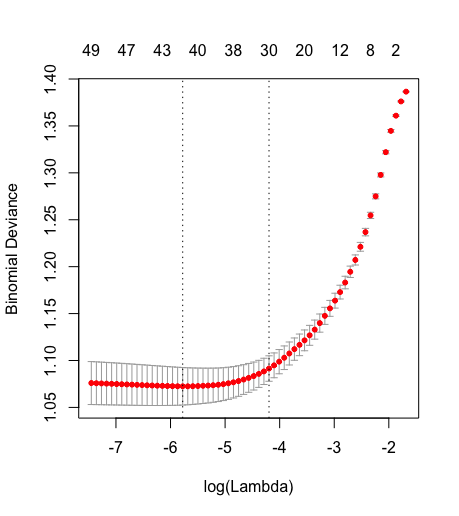

In [4]:
ElasticNet_drop_column = [
            'HCT_NM',
            'NIHS_4_in',
            'PTINR_NM',
            'NIHS_9_in',
            'ER_NM',
            'CRE_NM',
            'GCSM_NM',
            'CRP_NM',
            'GENDER_0',
            'GENDER_1',
            'NIHS_3_in',
            'ALB_NM',
            'NIHS_11_in',
            'HR_NM',
            'BT_NM',
            'PTT1_NM',
            'UR_ID',
            'RR_NM'
]

### Model Training and Testing

/Users/aalinc9/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aalinc9/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.96      0.78      0.86     20163
         1.0       0.31      0.74      0.44      2594

   micro avg       0.78      0.78      0.78     22757
   macro avg       0.63      0.76      0.65     22757
weighted avg       0.89      0.78      0.81     22757

SVM with all features: 0.8340695173197347


/Users/aalinc9/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aalinc9/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.96      0.79      0.86     20163
         1.0       0.31      0.72      0.43      2594

   micro avg       0.78      0.78      0.78     22757
   macro avg       0.63      0.76      0.65     22757
weighted avg       0.88      0.78      0.81     22757

SVM with ElasticNet Features: 0.8269279619367382


/Users/aalinc9/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/aalinc9/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84     20163
         1.0       0.27      0.71      0.39      2594

   micro avg       0.75      0.75      0.75     22757
   macro avg       0.61      0.73      0.62     22757
weighted avg       0.88      0.75      0.79     22757

SVM without Risk Factors: 0.8038489491064171


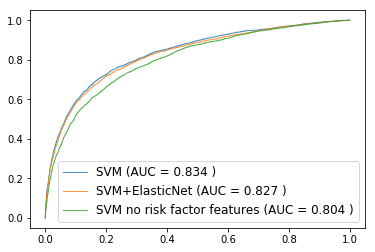

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt

training_data_name = 'training_data.pkl'
testing_data_name = 'testing_data.pkl'
if os.path.isfile(training_data_name) & os.path.isfile(testing_data_name):
    id_train, X_train, y_train = load_variable(training_data_name)
    id_test, X_test, y_test = load_variable(testing_data_name)
else:
    data = pd.read_csv('tsr_er.csv')
    data = get_binary_data(data)
    data = shuffle(data)

    id_data = data[['ICASE_ID', 'IDCASE_ID']]
    y_data = data[['ICD_ID']]
    X_data = data.drop(['ICASE_ID', 'IDCASE_ID', 'ICD_ID'], axis=1)
    id_train, id_test, X_train, X_test, y_train, y_test = train_test_split(id_data, X_data, y_data, test_size=0.33, random_state=42)
    # preprocess training data
    id_train, X_train, y_train = get_binary_Tomek_Links_cleaned_data(id_train, X_train, y_train)
    id_train, X_train, y_train = get_random_under_samples(id_train, X_train, y_train)
    scaler, X_train = normalization_onehotcoding_for_training(X_train)
    # preprocess testing data
    X_test = normalization_onehotcoding_for_testing(X_test, scaler)
    # saving data
    save_variables(training_data_name, [id_train, X_train, y_train])
    save_variables(testing_data_name, [id_test, X_test, y_test])


clf = SVC(probability=True)

# All Features
clf.fit(X_train, y_train)
y_predict = clf.predict(X_test)
print(classification_report(y_test, y_predict))
y_probas = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_probas[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVM (AUC = %0.3f )' % roc_auc, lw=1, alpha=.8)
print('SVM with all features:', roc_auc)
print('================================================')

# ElasticNet Features
X_train_Lasso = X_train.drop(ElasticNet_drop_column, axis=1)
X_test_Lasso = X_test.drop(ElasticNet_drop_column, axis=1)
clf.fit(X_train_Lasso, y_train)
y_predict = clf.predict(X_test_Lasso)
print(classification_report(y_test, y_predict))
y_probas_elastic = clf.predict_proba(X_test_Lasso)
fpr, tpr, thresholds = roc_curve(y_test, y_probas_elastic[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVM+ElasticNet (AUC = %0.3f )' % roc_auc, lw=1, alpha=.8)
print('SVM with ElasticNet Features:',roc_auc)
print('================================================')

# no Risk Factors
X_train_no_dgfa = X_train.drop(dgfa_column, axis=1)
clf.fit(X_train_no_dgfa, y_train)
X_test_no_dgfa = X_test.drop(dgfa_column, axis=1)
y_predict_no_dgfa = clf.predict(X_test_no_dgfa)
print(classification_report(y_test, y_predict_no_dgfa))
y_probas_no_dgfa = clf.predict_proba(X_test_no_dgfa)
fpr, tpr, thresholds = roc_curve(y_test, y_probas_no_dgfa[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='SVM no risk factor features (AUC = %0.3f )' % roc_auc, lw=1, alpha=.8)
print('SVM without Risk Factors:',roc_auc)
print('================================================')


plt.legend(loc="lower right", prop={'size': 12})
plt.show()